# Using sklearn!

Fortunately we do not need to code each ML algorithm! *scikit-learn* contains many optimized implementations for various algorithms!


In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

def create_data(n_samples=10, noise=0.1):
    x_true = np.linspace(0, 1, 100)
    y_true = np.sin(2*np.pi*x_true)

    x = np.linspace(0, 1, n_samples)
    y = np.sin(2*np.pi*x) + np.random.randn(*x.shape) * noise
    return (x_true, y_true), (x, y)

Import sklearn!

In [2]:
from sklearn.linear_model import LinearRegression

In [3]:
def fit_plot_linear(N = 10, l=0):
    
    (x_true, y_true), (x, y) = create_data(N)
    # Add an extra axis to be compliant with sk-learn
    x = x[:, np.newaxis]
    
    # We just need these two lines!
    model = LinearRegression()
    model.fit(x, y)
    
    # Get the predictions
    y_pred = model.predict(x)
    
    # Get the decision function
    x_des = np.linspace(0, 1, 100)
    x_des = x_des[:, np.newaxis]
    y_des = model.predict(x_des)


    plt.plot(x_true, y_true)
    plt.plot(x_des, y_des, c='r')
    plt.legend(['True function', 'Regressed function'])
    plt.scatter(x, y,)
    plt.scatter(x, y_pred, c='r')
    plt.title( 'N = ' + str(N) + " lambda = " + str(l))
    plt.show()
    
    
    # Create a validation set
    _,  (x_val, y_val) = create_data(211, noise=0.1)
    x_val = x_val[:, np.newaxis]
    y_val_pred = model.predict(x_val)

    print( " train error = ", np.sum((y - y_pred)**2), " test error = ", np.sum((y_val - y_val_pred)**2))
    

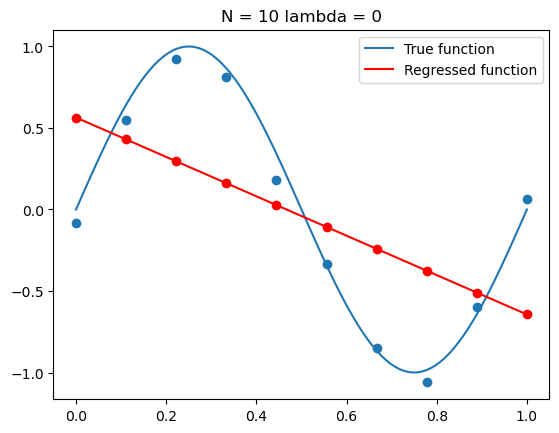

 train error =  2.677848567941705  test error =  53.161372723655184


In [4]:
fit_plot_linear(N = 10, l=0)

How can we get the parameters from a scikit learn model?

In [5]:
(x_true, y_true), (x, y) = create_data(10)
x = x[:, np.newaxis]

model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [6]:
print(model.coef_)

[-1.44508672]


In [7]:
print(model.intercept_)

0.7272354489232642


Using basis functions!

In [8]:
from sklearn.preprocessing import PolynomialFeatures

In [9]:
def fit_plot_poly(M = 3, N = 10, l=0):
    
    (x_true, y_true), (x, y) = create_data(N)
    # Add an extra axis to be compliant with sk-learn
    x = x[:, np.newaxis]
    
    # We just need this line!
    feature_extractor = PolynomialFeatures(degree = M)
    feature_extractor.fit(x)
    x_feat = feature_extractor.transform(x)
    
    # We just need these two lines!
    model = LinearRegression()
    model.fit(x_feat, y)
    
    # Get the predictions
    y_pred = model.predict(x_feat)
    
    # Get the decision function
    x_des = np.linspace(0, 1, 100)
    x_des = x_des[:, np.newaxis]
    # Note that we need to extract features each time we call this function!
    x_des_feat = feature_extractor.transform(x_des)
    y_des = model.predict(x_des_feat)

        
    plt.plot(x_true, y_true)
    plt.plot(x_des, y_des, c='r')
    plt.legend(['True function', 'Regressed function'])
    plt.scatter(x, y,)
    plt.scatter(x, y_pred, c='r')
    plt.title( 'N = ' + str(N) + " lambda = " + str(l))
    plt.show()
    
    # Create a validation set
    _,  (x_val, y_val) = create_data(211, noise=0.1)
    x_val = x_val[:, np.newaxis]
    x_val_feat = feature_extractor.transform(x_val)
    y_val_pred = model.predict(x_val_feat)

    print( " train error = ", np.sum((y - y_pred)**2), " test error = ", np.sum((y_val - y_val_pred)**2))
    
    print("W = ", model.coef_)
    print(model.intercept_)

Note that according to scikit-learn:

Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].

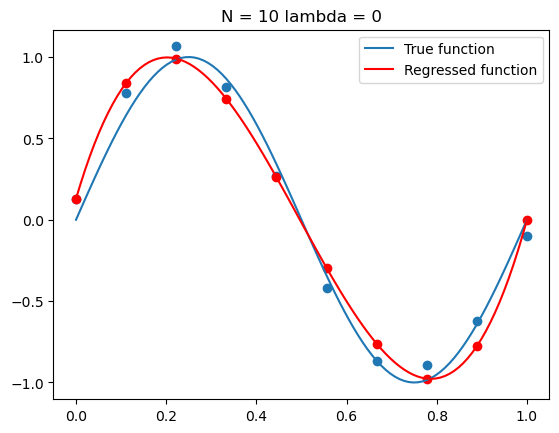

 train error =  0.08123446592994199  test error =  4.83802619809123
W =  [  0.           9.40452601 -29.26101527  19.72582767]
0.129278246851304


In [10]:
fit_plot_poly(M = 3, N = 10, l=0)

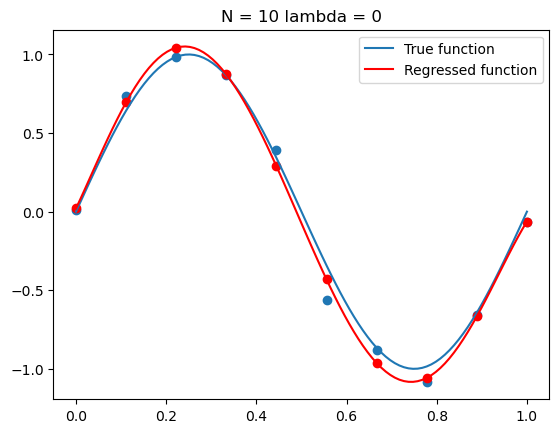

 train error =  0.0404153722462251  test error =  3.32091071729641
W =  [   0.            6.08969682    9.60563575 -103.33769942  148.47164566
  -60.91292056]
0.020511830158125327


In [11]:
fit_plot_poly(M = 5, N = 10, l=0)

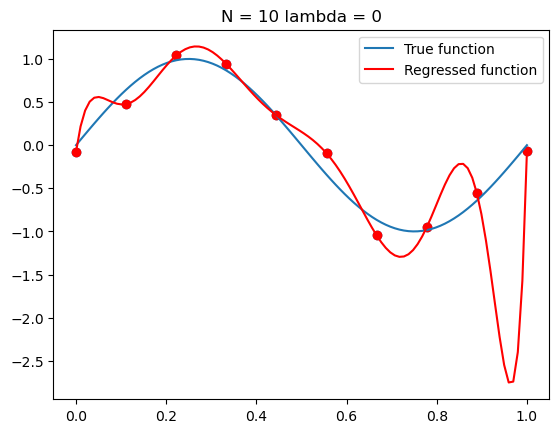

 train error =  5.540181675459388e-23  test error =  80.32288326524073
W =  [-4.29698684e-06  3.57544166e+01 -7.11351988e+02  6.16314120e+03
 -2.54459355e+04  5.07186063e+04 -3.57535165e+04 -2.69027385e+04
  4.07959379e+04  2.41371760e+04 -5.39236528e+04  2.08865848e+04]
-0.07688014296201878


In [12]:
fit_plot_poly(M = 11, N = 10, l=0)

Using ridge regression is extremely simple!


In [13]:
from sklearn.linear_model import Ridge
def fit_plot_poly_ridge(M = 3, N = 10, l=0):
    
    (x_true, y_true), (x, y) = create_data(N)
    # Add an extra axis to be compliant with sk-learn
    x = x[:, np.newaxis]
    
    # We just need this line!
    feature_extractor = PolynomialFeatures(degree = M)
    feature_extractor.fit(x)
    x_feat = feature_extractor.transform(x)
    
    # We just need these two lines!
    # Note that lambda is called alpha by sklearn
    model = Ridge(alpha=l, solver='svd')
    model.fit(x_feat, y)
    
    # Get the predictions
    y_pred = model.predict(x_feat)
    
    # Get the decision function
    x_des = np.linspace(0, 1, 100)
    x_des = x_des[:, np.newaxis]
    # Note that we need to extract features each time we call this function!
    x_des_feat = feature_extractor.transform(x_des)
    y_des = model.predict(x_des_feat)

        
    plt.plot(x_true, y_true)
    plt.plot(x_des, y_des, c='r')
    plt.legend(['True function', 'Regressed function'])
    plt.scatter(x, y,)
    plt.scatter(x, y_pred, c='r')
    plt.title( 'N = ' + str(N) + " lambda = " + str(l))
    plt.show()
    
    # Create a validation set
    _,  (x_val, y_val) = create_data(211, noise=0.1)
    x_val = x_val[:, np.newaxis]
    x_val_feat = feature_extractor.transform(x_val)
    y_val_pred = model.predict(x_val_feat)

    print( " train error = ", np.sum((y - y_pred)**2), " test error = ", np.sum((y_val - y_val_pred)**2))
    
    print("W = ", model.coef_)
    print(model.intercept_)

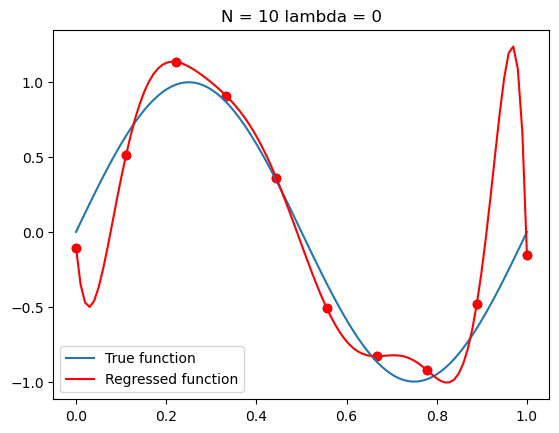

 train error =  1.3367073042677507e-22  test error =  32.60272377152095
W =  [ 2.98973063e-06 -3.13627788e+01  7.58058850e+02 -5.69422247e+03
  2.05957816e+04 -3.71675577e+04  2.33556571e+04  2.01112676e+04
 -2.66002248e+04 -1.73752396e+04  3.53111826e+04 -1.32633888e+04]
-0.10487029775397008


In [14]:
fit_plot_poly_ridge(M = 11, N = 10, l=0)

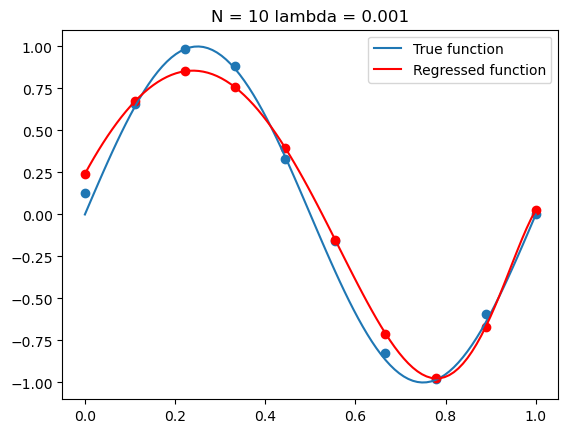

 train error =  0.07134329287513466  test error =  4.251181769967275
W =  [ 5.30778589e-14  4.92507715e+00 -8.83348330e+00 -4.59737255e+00
  3.69331223e-01  3.14033382e+00  3.93013663e+00  3.39701116e+00
  2.08433620e+00  3.62301977e-01 -1.53359893e+00 -3.45917811e+00]
0.24175628892643214


In [15]:
fit_plot_poly_ridge(M = 11, N = 10, l=0.001)

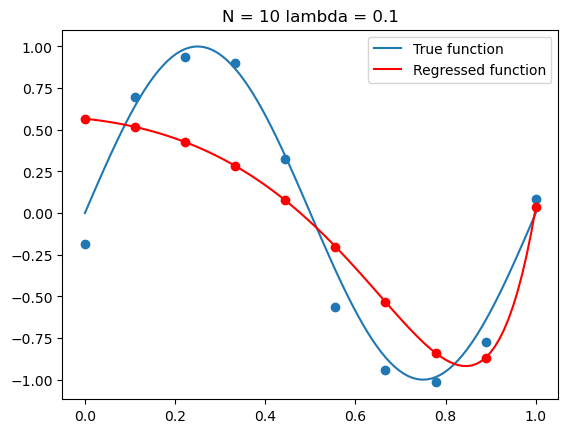

 train error =  1.638647532046667  test error =  25.98906284190463
W =  [ 3.20133372e-15 -2.84946780e-01 -1.30629562e+00 -9.89628166e-01
 -5.14567946e-01 -1.25793551e-01  1.51383135e-01  3.38366731e-01
  4.60596586e-01  5.38361083e-01  5.86182795e-01  6.14047100e-01]
0.5662613422100531


In [16]:
fit_plot_poly_ridge(M = 11, N = 10, l=0.1)

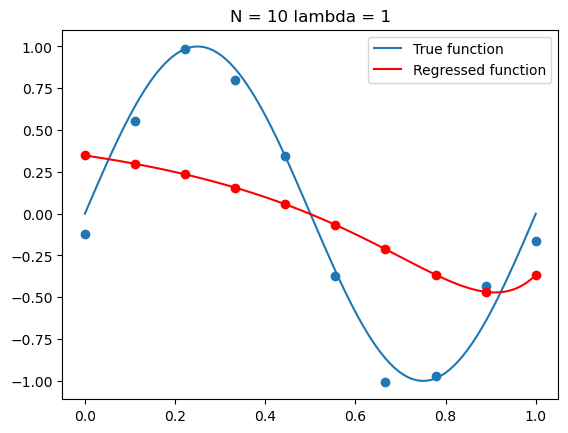

 train error =  2.4797956862256747  test error =  53.042633959789725
W =  [ 3.83195691e-16 -3.99902486e-01 -4.15377230e-01 -2.88193827e-01
 -1.62497670e-01 -6.34814930e-02  9.78176271e-03  6.29116714e-02
  1.01242657e-01  1.28914512e-01  1.48947378e-01  1.63498475e-01]
0.3481964642879736


In [17]:
fit_plot_poly_ridge(M = 11, N = 10, l=1)